## Bioinformatics - Data Collection and Pre-Processing

In [1]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [4]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('CHEMBL3577')
targets = pd.DataFrame.from_dict(target_query)
targets

cross_references      organism  \
0  [{'xref_id': 'P00352', 'xref_name': None, 'xre...  Homo sapiens   
1                                                 []  Homo sapiens   

                    pref_name  score  species_group_flag target_chembl_id  \
0  Aldehyde dehydrogenase 1A1   14.0               False       CHEMBL3577   
1      Aldehyde dehydrogenase    5.0               False    CHEMBL3542434   

                                   target_components     target_type  tax_id  
0  [{'accession': 'P00352', 'component_descriptio...  SINGLE PROTEIN    9606  
1  [{'accession': 'P51649', 'component_descriptio...  PROTEIN FAMILY    9606

In [5]:
selected_target = targets.target_chembl_id[0] # retrieve bioactivity data reported as IC50 values
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="Potency")

In [6]:
df = pd.DataFrame.from_dict(res)
df

action_type activity_comment  activity_id activity_properties  \
0            None     Inconclusive      4117815                  []   
1            None     Inconclusive      4117816                  []   
2            None     Inconclusive      4117817                  []   
3            None     Inconclusive      4117818                  []   
4            None     Inconclusive      4117819                  []   
...           ...              ...          ...                 ...   
76240        None           active     15527679                  []   
76241        None           active     15527680                  []   
76242        None           active     15527681                  []   
76243        None           active     15527682                  []   
76244        None           active     15527683                  []   

      assay_chembl_id                                  assay_description  \
0       CHEMBL1614458  PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...   
1       CHEMBL1614458  PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...   
2       CHEMBL1614458  PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...   
3       CHEMBL1614458  PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...   
4       CHEMBL1614458  PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...   
...               ...                                                ...   
76240   CHEMBL3562125  PubChem BioAssay. Extended Characterization of...   
76241   CHEMBL3562125  PubChem BioAssay. Extended Characterization of...   
76242   CHEMBL3562125  PubChem BioAssay. Extended Characterization of...   
76243   CHEMBL3562125  PubChem BioAssay. Extended Characterization of...   
76244   CHEMBL3562125  PubChem BioAssay. Extended Characterization of...   

      assay_type assay_variant_accession assay_variant_mutation bao_endpoint  \
0              F                    None                   None  BAO_0000186   
1              F                    None                   None  BAO_0000186   
2              F                    None                   None  BAO_0000186   
3              F                    None                   None  BAO_0000186   
4              F                    None                   None  BAO_0000186   
...          ...                     ...                    ...          ...   
76240          F                    None                   None  BAO_0000186   
76241          F                    None                   None  BAO_0000186   
76242          F                    None                   None  BAO_0000186   
76243          F                    None                   None  BAO_0000186   
76244          F                    None                   None  BAO_0000186   

       ... target_organism            target_pref_name target_tax_id  \
0      ...    Homo sapiens  Aldehyde dehydrogenase 1A1          9606   
1      ...    Homo sapiens  Aldehyde dehydrogenase 1A1          9606   
2      ...    Homo sapiens  Aldehyde dehydrogenase 1A1          9606   
3      ...    Homo sapiens  Aldehyde dehydrogenase 1A1          9606   
4      ...    Homo sapiens  Aldehyde dehydrogenase 1A1          9606   
...    ...             ...                         ...           ...   
76240  ...    Homo sapiens  Aldehyde dehydrogenase 1A1          9606   
76241  ...    Homo sapiens  Aldehyde dehydrogenase 1A1          9606   
76242  ...    Homo sapiens  Aldehyde dehydrogenase 1A1          9606   
76243  ...    Homo sapiens  Aldehyde dehydrogenase 1A1          9606   
76244  ...    Homo sapiens  Aldehyde dehydrogenase 1A1          9606   

      text_value  toid     type units    uo_units upper_value    value  
0           None  None  Potency    um  UO_0000065        None  39.8107  
1           None  None  Potency    um  UO_0000065        None  39.8107  
2           None  None  Potency    um  UO_0000065        None  28.1838  
3           None  None  Potency    um  UO_0000065        None   8.9125  
4           None  None  Potency    um  UO_0000065

In [7]:
df.to_csv('data/bioactivity_raw.csv',index=False)

### Handling missing data

In [2]:
import pandas as pd
df = pd.read_csv('data/bioactivity_raw.csv',dtype = {'Canonical_smiles':str})

/var/folders/pj/44_k69r55f7c8lndy32p_y1m0000gn/T/ipykernel_34516/2451697761.py:2: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/bioactivity_raw.csv',dtype = {'Canonical_smiles':str})


In [3]:
df2 = df[df.standard_value.notna()]
df2 = df2[df2.canonical_smiles.notna()]
print(f"The shape for df1 and df2 are {df.shape} and {df2.shape}")

The shape for df1 and df2 are (51656, 46) and (51565, 46)


In [4]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2[selection]
df3.reset_index(drop=True, inplace=True)
df3

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL1344425                         CCc1ccc(NC(S)=Nn2cnnc2)cc1   
1          CHEMBL1366528          O=C(CSc1ccc(-c2ccccn2)nn1)Nc1ccc(F)c(F)c1   
2          CHEMBL1514697  CC(Nc1ccc(-c2nc(-c3ccco3)no2)cc1[N+](=O)[O-])c...   
3          CHEMBL1457180  Cc1cccc(-n2c(S)nnc2CNC(=O)c2cccc([N+](=O)[O-])...   
4          CHEMBL1371111  Cn1cc(CN(CCCN2CCOCC2)C(S)=Nc2cccc(Cl)c2)c2ccccc21   
...                  ...                                                ...   
51560      CHEMBL1474316  CCCn1c2ccccc2c2cnn(CC(=O)N3CCCC(C(=O)OCC)C3)c(...   
51561      CHEMBL1495254                   Cc1cc(-c2csc3ncnc(S)c23)cc(C)c1C   
51562      CHEMBL3197762     COc1cc(N/N=C(\C)c2ccc(O)c(C)c2)nc(-c2ccccc2)n1   
51563      CHEMBL1589641  CCCCNC(C(=O)Nc1ccc(Cl)c([N+](=O)[O-])c1)c1cccc...   
51564      CHEMBL1496441                     Cc1ccc(NC(=O)c2noc3c2CCC3)cc1C   

       standard_value  
0             79432.8  
1             31622.8  
2             70794.6  
3             15848.9  
4             44668.4  
...               ...  
51560         79432.8  
51561         79432.8  
51562         56234.1  
51563          2818.4  
51564         39810.7  

[51565 rows x 3 columns]

In [5]:
df3.standard_value.describe()

count    5.156500e+04
mean     4.389564e+04
std      3.607866e+04
min      1.000000e-02
25%      2.238720e+04
50%      4.466840e+04
75%      5.623410e+04
max      5.623413e+06
Name: standard_value, dtype: float64

In [6]:
import numpy as np

def logPotency(input):

    # for i in input['standard_value']:
    #     molar = i*(10**-9) # Converts nM to M
    #     logPot.append(-np.log10(i))

    logPot = [(-np.log10(i*(10**-9))) for i in input['standard_value']]
    return logPot

In [7]:
logPoten = logPotency(df3)
logPoten

[4.100000128334196,
 4.499999678657065,
 4.149999867728904,
 4.800000874803203,
 4.349999603463148,
 4.499999678657065,
 5.149997413907539,
 5.0,
 5.499996931948306,
 4.349999603463148,
 4.100000128334196,
 4.100000128334196,
 4.100000128334196,
 5.2500010234416505,
 4.450000476425332,
 4.40000018605658,
 4.300000202445418,
 4.100000128334196,
 4.049999969853415,
 4.250000251143582,
 4.100000128334196,
 4.049999969853415,
 4.250000251143582,
 4.349999603463148,
 4.250000251143582,
 4.100000128334196,
 4.0,
 4.40000018605658,
 4.499999678657065,
 5.0,
 4.749999855918706,
 4.349999603463148,
 4.40000018605658,
 5.0,
 4.049999969853415,
 4.100000128334196,
 4.100000128334196,
 4.800000874803203,
 5.850011543508524,
 4.59999938302362,
 4.550000451689026,
 4.550000451689026,
 4.40000018605658,
 4.049999969853415,
 4.450000476425332,
 4.349999603463148,
 4.100000128334196,
 4.59999938302362,
 4.349999603463148,
 4.0,
 4.049999969853415,
 4.250000251143582,
 4.499999678657065,
 4.400000186056

In [9]:
df3['logPotency'] = logPoten
df3

/var/folders/pj/44_k69r55f7c8lndy32p_y1m0000gn/T/ipykernel_34516/1710134476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['logPotency'] = logPoten


molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL1344425                         CCc1ccc(NC(S)=Nn2cnnc2)cc1   
1          CHEMBL1366528          O=C(CSc1ccc(-c2ccccn2)nn1)Nc1ccc(F)c(F)c1   
2          CHEMBL1514697  CC(Nc1ccc(-c2nc(-c3ccco3)no2)cc1[N+](=O)[O-])c...   
3          CHEMBL1457180  Cc1cccc(-n2c(S)nnc2CNC(=O)c2cccc([N+](=O)[O-])...   
4          CHEMBL1371111  Cn1cc(CN(CCCN2CCOCC2)C(S)=Nc2cccc(Cl)c2)c2ccccc21   
...                  ...                                                ...   
51560      CHEMBL1474316  CCCn1c2ccccc2c2cnn(CC(=O)N3CCCC(C(=O)OCC)C3)c(...   
51561      CHEMBL1495254                   Cc1cc(-c2csc3ncnc(S)c23)cc(C)c1C   
51562      CHEMBL3197762     COc1cc(N/N=C(\C)c2ccc(O)c(C)c2)nc(-c2ccccc2)n1   
51563      CHEMBL1589641  CCCCNC(C(=O)Nc1ccc(Cl)c([N+](=O)[O-])c1)c1cccc...   
51564      CHEMBL1496441                     Cc1ccc(NC(=O)c2noc3c2CCC3)cc1C   

       standard_value  logPotency  
0             79432.8    4.100000  
1             31622.8    4.500000  
2             70794.6    4.150000  
3             15848.9    4.800001  
4             44668.4    4.350000  
...               ...         ...  
51560         79432.8    4.100000  
51561         79432.8    4.100000  
51562         56234.1    4.250000  
51563          2818.4    5.549997  
51564         39810.7    4.400000  

[51565 rows x 4 columns]

In [10]:
df3.logPotency.describe()

count    51565.000000
mean         4.495123
std          0.427868
min          2.250000
25%          4.250000
50%          4.350000
75%          4.650000
max         11.000000
Name: logPotency, dtype: float64

In [13]:
df3.to_csv('data/logPotency_51565*4.csv',index=False)

## Dataset Preparation

In [7]:
import pandas as pd
df = pd.read_csv('data/logPotency_51565*4.csv')
df

molecule_chembl_id                                   canonical_smiles  \
0          CHEMBL1344425                         CCc1ccc(NC(S)=Nn2cnnc2)cc1   
1          CHEMBL1366528          O=C(CSc1ccc(-c2ccccn2)nn1)Nc1ccc(F)c(F)c1   
2          CHEMBL1514697  CC(Nc1ccc(-c2nc(-c3ccco3)no2)cc1[N+](=O)[O-])c...   
3          CHEMBL1457180  Cc1cccc(-n2c(S)nnc2CNC(=O)c2cccc([N+](=O)[O-])...   
4          CHEMBL1371111  Cn1cc(CN(CCCN2CCOCC2)C(S)=Nc2cccc(Cl)c2)c2ccccc21   
...                  ...                                                ...   
51560      CHEMBL1474316  CCCn1c2ccccc2c2cnn(CC(=O)N3CCCC(C(=O)OCC)C3)c(...   
51561      CHEMBL1495254                   Cc1cc(-c2csc3ncnc(S)c23)cc(C)c1C   
51562      CHEMBL3197762     COc1cc(N/N=C(\C)c2ccc(O)c(C)c2)nc(-c2ccccc2)n1   
51563      CHEMBL1589641  CCCCNC(C(=O)Nc1ccc(Cl)c([N+](=O)[O-])c1)c1cccc...   
51564      CHEMBL1496441                     Cc1ccc(NC(=O)c2noc3c2CCC3)cc1C   

       standard_value  logPotency  
0             79432.8    4.100000  
1             31622.8    4.500000  
2             70794.6    4.150000  
3             15848.9    4.800001  
4             44668.4    4.350000  
...               ...         ...  
51560         79432.8    4.100000  
51561         79432.8    4.100000  
51562         56234.1    4.250000  
51563          2818.4    5.549997  
51564         39810.7    4.400000  

[51565 rows x 4 columns]

In [2]:
selection = ['canonical_smiles','molecule_chembl_id']
df_selection = df[selection]
df_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [16]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-07-07 22:49:22--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-07-07 22:49:23--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: 'padel.zip'

padel.zip           100%[===================>]  24.57M  17.5MB/s    in 1.4s    

2023-07-07 22:49:25 (17.5 MB/s) - 'padel.zip' saved [25768637/25768637]

--2023-07-07 22:49:25-

In [17]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [3]:
! bash padel.sh

Processing CHEMBL1344425 in molecule.smi (1/51565). 
Processing CHEMBL1366528 in molecule.smi (2/51565). 
Processing CHEMBL1514697 in molecule.smi (3/51565). 
Processing CHEMBL1457180 in molecule.smi (4/51565). 
Processing CHEMBL1371111 in molecule.smi (5/51565). 
Processing CHEMBL1360140 in molecule.smi (6/51565). 
Processing CHEMBL1494024 in molecule.smi (7/51565). 
Processing CHEMBL1391505 in molecule.smi (8/51565). 
Processing CHEMBL1697881 in molecule.smi (9/51565). Average speed: 8.26 s/mol.
Processing CHEMBL1509395 in molecule.smi (10/51565). Average speed: 4.26 s/mol.
Processing CHEMBL1462784 in molecule.smi (11/51565). Average speed: 2.86 s/mol.
Processing CHEMBL1555532 in molecule.smi (12/51565). Average speed: 2.15 s/mol.
Processing CHEMBL1327536 in molecule.smi (13/51565). Average speed: 1.72 s/mol.
Processing CHEMBL1322522 in molecule.smi (14/51565). Average speed: 1.44 s/mol.
Processing CHEMBL1357660 in molecule.smi (15/51565). Average speed: 1.44 s/mol.
Processing CHEMBL

In [11]:
df3_X = pd.read_csv('descriptors_output.csv')
df3_X.to_csv('data/descriptors.csv',index=False)
df3_X

Name  PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  \
0      CHEMBL1344425           1           1           0           0   
1      CHEMBL1366528           1           1           0           0   
2      CHEMBL1457180           1           1           1           0   
3      CHEMBL1391505           1           1           1           0   
4      CHEMBL1360140           1           1           1           0   
...              ...         ...         ...         ...         ...   
51560  CHEMBL1495254           1           1           0           0   
51561  CHEMBL3197762           1           1           1           0   
51562  CHEMBL3211742           1           1           1           0   
51563  CHEMBL1496441           1           1           1           0   
51564  CHEMBL1589641           1           1           1           0   

       PubchemFP4  PubchemFP5  PubchemFP6  PubchemFP7  PubchemFP8  ...  \
0               0           0           0           0           0  ...   
1               0           0           0           0           0  ...   
2               0           0           0           0           0  ...   
3               0           0           0           0           0  ...   
4               0           0           0           0           0  ...   
...           ...         ...         ...         ...         ...  ...   
51560           0           0           0           0           0  ...   
51561           0           0           0           0           0  ...   
51562           0           0           0           0           0  ...   
51563           0           0           0           0           0  ...   
51564           0           0           0           0           0  ...   

       PubchemFP871  PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  \
0                 0             0             0             0             0   
1                 0             0             0             0             0   
2                 0             0             0             0             0   
3                 0             0             0             0             0   
4                 0             0             0             0             0   
...             ...           ...           ...           ...           ...   
51560             0             0             0             0             0   
51561             0             0             0             0             0   
51562             0             0             0             0             0   
51563             0             0             0             0             0   
51564             0             0             0             0             0   

       PubchemFP876  PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                 0             0             0             0             0  
1                 0             0             0             0             0  
2                 0             0             0             0             0  
3                 0             0             0             0             0  
4                 0             0             0             0             0  
...             ...           ...           ...           ...           ...  
51560             0             0             0             0             0  
51561             0             0             0             0             0  
51562             0             0             0             0             0  
51563             0             0             0             0             0  
51564             0             0             0             0             0  

[51565 rows x 882 columns]

In [12]:
df3_X = df3_X.drop(columns=['Name'])
df3_Y = df['logPotency']
df3_X

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0               1           1           0           0           0           0   
1               1           1           0           0           0           0   
2               1           1           1           0           0           0   
3               1           1           1           0           0           0   
4               1           1           1           0           0           0   
...           ...         ...         ...         ...         ...         ...   
51560           1           1           0           0           0           0   
51561           1           1           1           0           0           0   
51562           1           1           1           0           0           0   
51563           1           1           1           0           0           0   
51564           1           1           1           0           0           0   

       PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP871  \
0               0           0           0           1  ...             0   
1               0           0           0           1  ...             0   
2               0           0           0           1  ...             0   
3               0           0           0           1  ...             0   
4               0           0           0           1  ...             0   
...           ...         ...         ...         ...  ...           ...   
51560           0           0           0           1  ...             0   
51561           0           0           0           1  ...             0   
51562           0           0           0           1  ...             0   
51563           0           0           0           1  ...             0   
51564           0           0           0           1  ...             0   

       PubchemFP872  PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  \
0                 0             0             0             0             0   
1                 0             0             0             0             0   
2                 0             0             0             0             0   
3                 0             0             0             0             0   
4                 0             0             0             0             0   
...             ...           ...           ...           ...           ...   
51560             0             0             0             0             0   
51561             0             0             0             0             0   
51562             0             0             0             0             0   
51563             0             0             0             0             0   
51564             0             0             0             0             0   

       PubchemFP877  PubchemFP878  PubchemFP879  PubchemFP880  
0                 0             0             0             0  
1                 0             0             0             0  
2                 0             0             0             0  
3                 0             0             0             0  
4                 0             0             0             0  
...             ...           ...           ...           ...  
51560             0             0             0             0  
51561             0             0             0             0  
51562             0             0             0             0  
51563             0             0             0             0  
51564             0             0             0             0  

[51565 rows x 881 columns]

In [13]:
df3_Y

0        4.100000
1        4.500000
2        4.150000
3        4.800001
4        4.350000
           ...   
51560    4.100000
51561    4.100000
51562    4.250000
51563    5.549997
51564    4.400000
Name: logPotency, Length: 51565, dtype: float64

In [14]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3.to_csv('data/data_XandY.csv', index=False)

In [15]:
dataset3

PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0               1           1           0           0           0           0   
1               1           1           0           0           0           0   
2               1           1           1           0           0           0   
3               1           1           1           0           0           0   
4               1           1           1           0           0           0   
...           ...         ...         ...         ...         ...         ...   
51560           1           1           0           0           0           0   
51561           1           1           1           0           0           0   
51562           1           1           1           0           0           0   
51563           1           1           1           0           0           0   
51564           1           1           1           0           0           0   

       PubchemFP6  PubchemFP7  PubchemFP8  PubchemFP9  ...  PubchemFP872  \
0               0           0           0           1  ...             0   
1               0           0           0           1  ...             0   
2               0           0           0           1  ...             0   
3               0           0           0           1  ...             0   
4               0           0           0           1  ...             0   
...           ...         ...         ...         ...  ...           ...   
51560           0           0           0           1  ...             0   
51561           0           0           0           1  ...             0   
51562           0           0           0           1  ...             0   
51563           0           0           0           1  ...             0   
51564           0           0           0           1  ...             0   

       PubchemFP873  PubchemFP874  PubchemFP875  PubchemFP876  PubchemFP877  \
0                 0             0             0             0             0   
1                 0             0             0             0             0   
2                 0             0             0             0             0   
3                 0             0             0             0             0   
4                 0             0             0             0             0   
...             ...           ...           ...           ...           ...   
51560             0             0             0             0             0   
51561             0             0             0             0             0   
51562             0             0             0             0             0   
51563             0             0             0             0             0   
51564             0             0             0             0             0   

       PubchemFP878  PubchemFP879  PubchemFP880  logPotency  
0                 0             0             0    4.100000  
1                 0             0             0    4.500000  
2                 0             0             0    4.150000  
3                 0             0             0    4.800001  
4                 0             0             0    4.350000  
...             ...           ...           ...         ...  
51560             0             0             0    4.100000  
51561             0             0             0    4.100000  
51562             0             0             0    4.250000  
51563             0             0             0    5.549997  
51564             0             0             0    4.400000  

[51565 rows x 882 columns]

## Model Comparisons

In [16]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import pickle

In [33]:
df = pd.read_csv('data/data_XandY.csv')
X = df.drop('logPotency',axis = 1)
Y = df.logPotency

In [34]:
# Removing low variance features
from sklearn.feature_selection import VarianceThreshold
X = df.drop('logPotency',axis = 1)
selection = VarianceThreshold(threshold=0.02)
X = selection.fit(X)
len(list(selection.get_feature_names_out()))

441

In [35]:
pickle.dump(list(selection.get_feature_names_out()),open('data/selected_features.pkl','wb'))

In [36]:
df = pd.read_csv('data/data_XandY.csv')
X = df.drop('logPotency',axis = 1)
Y = df.logPotency
selection = VarianceThreshold(threshold=0.02)
X = selection.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [22]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [37]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

 24%|██▍       | 10/42 [04:11<23:35, 44.24s/it]

: 

: 

In [115]:
models_train

Adjusted R-Squared  \
Model                                                        
DecisionTreeRegressor                                 0.77   
ExtraTreeRegressor                                    0.77   
ExtraTreesRegressor                                   0.77   
GaussianProcessRegressor                              0.77   
RandomForestRegressor                                 0.72   
BaggingRegressor                                      0.70   
MLPRegressor                                          0.66   
XGBRegressor                                          0.65   
HistGradientBoostingRegressor                         0.50   
LGBMRegressor                                         0.49   
KNeighborsRegressor                                   0.41   
SVR                                                   0.41   
NuSVR                                                 0.40   
GradientBoostingRegressor                             0.30   
Ridge                                                 0.28   
TransformedTargetRegressor                            0.28   
LinearRegression                                      0.28   
RidgeCV                                               0.27   
HuberRegressor                                        0.24   
LassoCV                                               0.24   
ElasticNetCV                                          0.24   
BayesianRidge                                         0.23   
PoissonRegressor                                      0.22   
LinearSVR                                             0.19   
OrthogonalMatchingPursuit                             0.16   
OrthogonalMatchingPursuitCV                           0.16   
GammaRegressor                                        0.16   
TweedieRegressor                                      0.16   
SGDRegressor                                          0.15   
LassoLarsCV                                           0.14   
LassoLarsIC                                           0.14   
LarsCV                                                0.12   
AdaBoostRegressor                                     0.07   
Lasso                                                -0.08   
ElasticNet                                           -0.08   
DummyRegressor                                       -0.08   
LassoLars                                            -0.08   
PassiveAggressiveRegressor                           -0.80   
KernelRidge                                         -15.20   
Lars                                          -17282556.62   
RANSACRegressor               -112065439934629430689792.00   

                                                 R-Squared            RMSE  \
Model                                                                        
DecisionTreeRegressor                                 0.79            0.73   
ExtraTreeRegressor                                    0.79            0.73   
ExtraTreesRegressor                                   0.79            0.73   
GaussianProcessRegressor                              0.79            0.73   
RandomForestRegressor                                 0.74            0.81   
BaggingRegressor                                      0.72            0.84   
MLPRegressor                                          0.69            0.88   
XGBRegressor                                          0.68            0.90   
HistGradientBoostingRegressor                         0.53            1.08   
LGBMRegressor                                         0.53            1.08   
KNeighborsRegressor                                   0.46            1.16   
SVR                                                   0.45            1.17   
NuSVR                                                 0.45            1.18   
GradientBoostingRegressor                             0.35            1.27   
Ridge                                                 0.33            1.29   
TransformedTargetRegressor                     

In [116]:
models_test

Adjusted R-Squared  \
Model                                                       
HistGradientBoostingRegressor                        0.12   
LGBMRegressor                                        0.12   
SVR                                                  0.07   
RandomForestRegressor                                0.07   
NuSVR                                                0.07   
XGBRegressor                                         0.05   
BaggingRegressor                                     0.02   
GradientBoostingRegressor                            0.01   
KNeighborsRegressor                                  0.00   
RidgeCV                                             -0.00   
LassoCV                                             -0.01   
ElasticNetCV                                        -0.01   
BayesianRidge                                       -0.02   
Ridge                                               -0.02   
HuberRegressor                                      -0.03   
PoissonRegressor                                    -0.03   
MLPRegressor                                        -0.09   
OrthogonalMatchingPursuitCV                         -0.11   
OrthogonalMatchingPursuit                           -0.11   
TweedieRegressor                                    -0.11   
SGDRegressor                                        -0.11   
GammaRegressor                                      -0.11   
LinearSVR                                           -0.12   
LassoLarsCV                                         -0.15   
LassoLarsIC                                         -0.15   
LarsCV                                              -0.17   
AdaBoostRegressor                                   -0.24   
ExtraTreesRegressor                                 -0.28   
ExtraTreeRegressor                                  -0.31   
DecisionTreeRegressor                               -0.33   
Lasso                                               -0.43   
ElasticNet                                          -0.43   
DummyRegressor                                      -0.43   
LassoLars                                           -0.43   
PassiveAggressiveRegressor                          -1.41   
GaussianProcessRegressor                           -10.53   
KernelRidge                                        -19.64   
Lars                           -1134860264891006451712.00   
LinearRegression              -21566317374786571862016.00   
TransformedTargetRegressor    -21566317374786571862016.00   
RANSACRegressor               -93516170066819381460992.00   

                                                R-Squared            RMSE  \
Model                                                                       
HistGradientBoostingRegressor                        0.39            1.27   
LGBMRegressor                                        0.39            1.27   
SVR                                                  0.35            1.31   
RandomForestRegressor                                0.35            1.31   
NuSVR                                                0.35            1.31   
XGBRegressor                                         0.33            1.32   
BaggingRegressor                                     0.32            1.34   
GradientBoostingRegressor                            0.31            1.35   
KNeighborsRegressor                                  0.30            1.35   
RidgeCV                                              0.30            1.36   
LassoCV                                              0.30            1.36   
ElasticNetCV                                         0.30            1.36   
BayesianRidge                                        0.29            1.37   
Ridge                                                0.29            1.37   
HuberRegressor                                       0.28            1.37   
PoissonRegressor                                     0.28            1.38   
MLPRegressor                 

<Axes: xlabel='pIC50'>

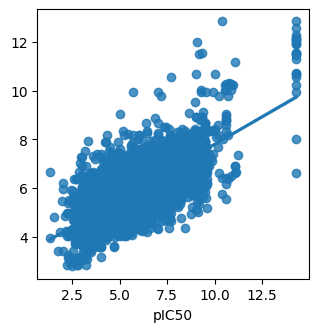

In [117]:
import lightgbm as ltb
import seaborn as sns
import matplotlib.pyplot as plt
model = ltb.LGBMRegressor()
model.fit(X,Y)
y_predicted = model.predict(X)
y_expected = Y
plt.figure(figsize=(3.5,3.5))
sns.regplot(x = y_expected, y = y_predicted, fit_reg=True)

In [118]:
import pickle
pickle.dump(model,open('data/trained_model.pkl','wb'))
